<a href="https://colab.research.google.com/github/Gopizone/DataScience/blob/main/Forecasting_Data_Driven_Models(Delhi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import timedelta

In [38]:
from google.colab import files
files=files.upload()

Saving Delhi.xlsx to Delhi (1).xlsx


In [72]:
df = pd.read_excel (r'Delhi.xlsx',header=0, parse_dates=True)

df.head()

,date,pm25
0,2018-04-20 00:00:00,92
1,2018-04-19 23:00:00,89
2,2018-04-19 22:00:00,75
3,2018-04-19 21:00:00,57
4,2018-04-19 20:00:00,57


In [73]:
df['date']=pd.to_datetime(df['date'],format='%d-%m-%Y %H:%M')

In [74]:
#df = df.set_index('date')
df['pm25'] = df['pm25'].replace('-',np.nan)
df['pm25']=df['pm25'].astype(str).astype(float)
df['pm25_U']=df['pm25']

In [75]:
start=df.date.min()
stop=df.date.max()
seriesDate=[]

while start < stop:
    start = start + timedelta(hours=1)
    seriesDate.append(start)

df3 = pd.DataFrame(columns = ['date', 'pm25']) 
df3['date']=seriesDate

In [76]:
result = pd.merge(df, df3, on="date", how="outer")

In [77]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2617 entries, 0 to 2616
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2617 non-null   datetime64[ns]
 1   pm25_x  2294 non-null   float64       
 2   pm25_U  2294 non-null   float64       
 3   pm25_y  0 non-null      object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 102.2+ KB


In [78]:
result=result.drop(columns=['pm25_y'])
result=result.rename(columns={"pm25_x": "pm25"})
result.count()

date      2617
pm25      2294
pm25_U    2294
dtype: int64

In [79]:
result=result.sort_values(by='date')
result = result.reset_index(drop=True)
result

,date,pm25,pm25_U
0,2018-01-01 00:00:00,423.0,423.0
1,2018-01-01 01:00:00,414.0,414.0
2,2018-01-01 02:00:00,417.0,417.0
3,2018-01-01 03:00:00,466.0,466.0
4,2018-01-01 04:00:00,470.0,470.0
...,...,...,...
2612,2018-04-19 20:00:00,57.0,57.0
2613,2018-04-19 21:00:00,57.0,57.0
2614,2018-04-19 22:00:00,75.0,75.0
2615,2018-04-19 23:00:00,89.0,89.0


In [80]:
result.isnull().sum()

date        0
pm25      323
pm25_U    323
dtype: int64

In [81]:
df=result

In [ ]:
#df=df.reindex(index=df.index[::-1]).reset_index()

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2617 non-null   datetime64[ns]
 1   pm25    2294 non-null   float64       
 2   pm25_U  2294 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 61.5 KB


In [83]:
df_missing=df[(df['pm25'].isnull()==True)]
df_missing['date']=pd.to_datetime(df_missing['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
df = df.dropna()
df.count()

date      2294
pm25      2294
pm25_U    2294
dtype: int64

In [85]:
df_missing.count()

date      323
pm25        0
pm25_U      0
dtype: int64

Handling missing data - mean before after method - mean of indentical hour in the week (+3 , -3)

In [86]:
def timewise_mean(arg_date):
    df1=df[(df['date'].dt.hour == arg_date.hour) & (df['date'].dt.day > arg_date.day-3) & (df['date'].dt.day < arg_date.day+3)] 
    return df1.pm25.mean()

for index,row in df_missing.iterrows():
    df_missing.at[index, 'pm25_U'] =timewise_mean(row['date'])

In [87]:
df2 = df.append(df_missing)
df2.pm25_U.count()
df2['date']=pd.to_datetime(df2['date'])
df2['pm25']=df2['pm25'].astype(str).astype(float)
df2['pm25_U']=df2['pm25_U'].astype(str).astype(float)

In [88]:
df2=df2.sort_values(by='date')

In [89]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2617 entries, 0 to 2616
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2617 non-null   datetime64[ns]
 1   pm25    2294 non-null   float64       
 2   pm25_U  2617 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 81.8 KB


In [90]:
df=df2

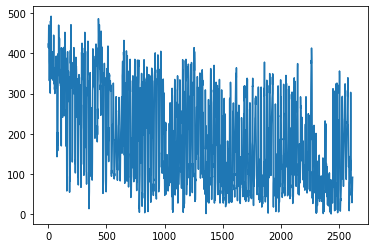

In [91]:
df.pm25_U.plot()

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Splitting data

In [93]:
Train = df.head(2095)
Test = df.tail(522)

# Moving Average 

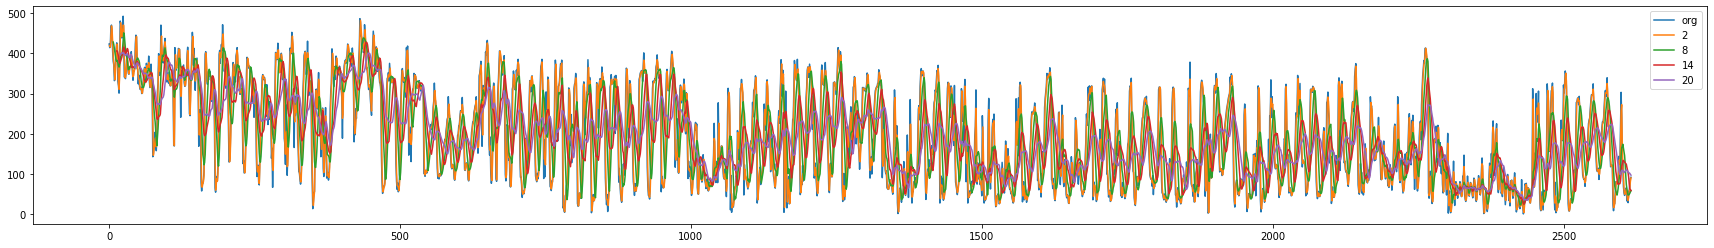

In [94]:
plt.figure(figsize=(30,4))
df.pm25_U.plot(label="org")
for i in range(2,24,6):
    df["pm25_U"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot 


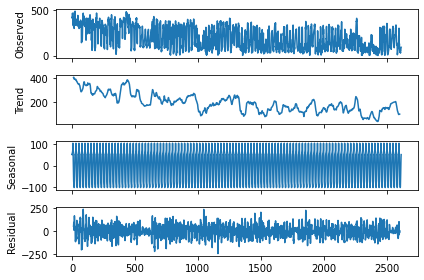

In [95]:
decompose_ts_add = seasonal_decompose(df.pm25_U,freq=24)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots


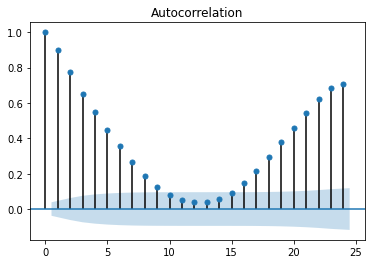

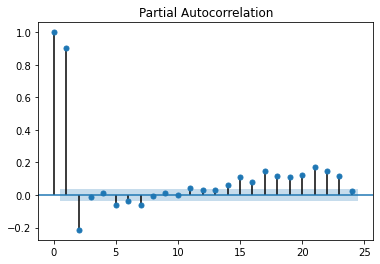

In [96]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.pm25_U,lags=24)
tsa_plots.plot_pacf(df.pm25_U,lags=24)
plt.show()


### Evaluation Metric MAPE

In [97]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [98]:
Test.tail(24)

,date,pm25,pm25_U
2593,2018-04-19 01:00:00,84.0,84.0
2594,2018-04-19 02:00:00,88.0,88.0
2595,2018-04-19 03:00:00,144.0,144.0
2596,2018-04-19 04:00:00,125.0,125.0
2597,2018-04-19 05:00:00,124.0,124.0
2598,2018-04-19 06:00:00,211.0,211.0
2599,2018-04-19 07:00:00,303.0,303.0
2600,2018-04-19 08:00:00,242.0,242.0
2601,2018-04-19 09:00:00,111.0,111.0
2602,2018-04-19 10:00:00,132.0,132.0


### Simple Exponential Method


In [115]:
ses_model = SimpleExpSmoothing(Train["pm25_U"]).fit(smoothing_level=0.1)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.pm25_U) 


231.8913702341863

### Holt method 

In [120]:
# Holt method 
hw_model = Holt(Train["pm25_U"]).fit(smoothing_level=0.1, smoothing_slope=0.05)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.pm25_U) 

91.9579590518517

### Holts winter exponential smoothing with additive seasonality and additive trend


In [116]:
hwe_model_add_add = ExponentialSmoothing(Train["pm25_U"],seasonal="add",trend="add",seasonal_periods=24).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.pm25_U) 

990.3533727474037

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [117]:
hwe_model_mul_add = ExponentialSmoothing(Train["pm25_U"],seasonal="mul",trend="add",seasonal_periods=24).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.pm25_U)

4399.299983198084

## Final Model by combining train and test

In [122]:
hw_model = Holt(df["pm25_U"]).fit(smoothing_level=0.1, smoothing_slope=0.05)


In [123]:
#Forecasting for next 24 hrs periods
hw_model.forecast(24)

2617    53.125309
2618    50.168659
2619    47.212010
2620    44.255360
2621    41.298710
2622    38.342060
2623    35.385410
2624    32.428760
2625    29.472111
2626    26.515461
2627    23.558811
2628    20.602161
2629    17.645511
2630    14.688861
2631    11.732212
2632     8.775562
2633     5.818912
2634     2.862262
2635    -0.094388
2636    -3.051037
2637    -6.007687
2638    -8.964337
2639   -11.920987
2640   -14.877637
dtype: float64